<a href="https://colab.research.google.com/github/ShotaSasaki-HCU/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

たくさん漢字が並んでいる画像の中から仲間はずれを探しましょう。
仲間はずれを見つけたら、何行目？何列目？の問いに答えましょう。
正解すると、正解までにかかった時間が表示されます。
それでは始めます。画像が表示されたらスタートです。


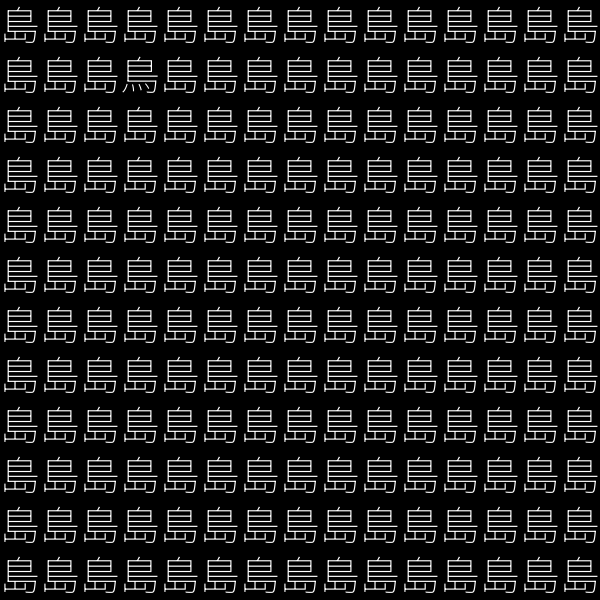

何行目？
何列目？
0:00:02.591743


In [59]:
import numpy as np
import cv2
from PIL import ImageFont, ImageDraw, Image
import sys
from google.colab.patches import cv2_imshow
from google.colab import output # 出力画面クリア用
import random
from datetime import datetime
import time

# OpenCVで日本語表示を実現する関数
def putText_japanese(img, text, point, size, color):
  # Noto Sans Japaneseフォントを使用する。
  # GitHubがttfファイルを認識しておらずRAWリンクが取得できないため、直接参照はできない。
  # そこで、!wgetを用いてGitHub上から、仮想マシンのローカルファイルにttfファイルをダウンロードする。
  !wget "https://github.com/ShotaSasaki-HCU/Prog2kakushin/raw/main/NotoSansJP-VariableFont_wght.ttf"
  output.clear() # !wgetでたくさん出力される文字列をクリア
  font = ImageFont.truetype('NotoSansJP-VariableFont_wght.ttf', size)

  # imgをndarrayから、PILに変換する。
  img_pil = Image.fromarray(img)
  # drawインスタンス生成
  draw = ImageDraw.Draw(img_pil)
  # テキスト描写
  # pointは、文字列の左上の位置である。
  draw.text(point, text, fill=color, font=font)

  # PILから、ndarrayに変換して返す。
  return np.array(img_pil)

# 似ている文字のペア
pairs = [['間', '問'], ['璧', '壁'], ['島', '鳥']]
pair = random.choice(pairs)

# 黒い画像を用意
img = np.zeros((600, 600, 3), np.uint8)

fake_row = random.randint(1, 12) # 仲間はずれの行
fake_column = random.randint(1, 15) # 仲間はずれの列
for row in range(0, 11+1):
  if (row + 1) == fake_row:
    string = pair[0]*(fake_column-1) + pair[1] + pair[0]*(15-fake_column)
  else:
    string = pair[0] * 15

  img = putText_japanese(img, string , (0, (50*row)-7), 40, (255, 255, 255))

print("たくさん漢字が並んでいる画像の中から仲間はずれを探しましょう。")
time.sleep(4)
print("仲間はずれを見つけたら、何行目？何列目？の問いに答えましょう。")
time.sleep(4)
print("正解すると、正解までにかかった時間が表示されます。")
time.sleep(4)
print("それでは始めます。画像が表示されたらスタートです。")
time.sleep(4)

cv2_imshow(img)
start = datetime.now() # 開始時刻を取得

row = input('何行目？')
column = input('何列目？')

end = datetime.now() # 終了時刻を取得
dif = end - start # 差分を計算
print(dif)